# Read the csv file

In [23]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment', None)
data = pd.read_csv("train.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Cleaning data

In [24]:
class Cleaner:
    def __init__(self, df,data_type):
        self.df = df
        self.data_type = data_type

    def clean(self):
        self.drop_unwanted()
        self.convert_text()
        self.convert_symbol()
        self.convert_int()
        self.switch()
        return self.df
    
    def drop_unwanted(self):
        if self.data_type == "train":
            self.df = self.df.drop(["Loan_ID"], axis=1)

    def convert_text(self):
        if self.data_type == "train":
            tab = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
        else:
            tab = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
        for col in tab:
            properties = self.df[col].unique()
            property2index = {prop:i for (i, prop) in enumerate(properties)}
            max_index = max(list(property2index.values()))
            self.df.loc[:, col] = self.df[col].replace(property2index).infer_objects(copy=False)
            self.df[col].fillna(max_index + 1).infer_objects(copy=False)

    def convert_symbol(self):
        self.df["Dependents"] = self.df["Dependents"].str.replace("+", "")

    def convert_int(self):
        #self.df = self.df.fillna(0)
        self.df = self.df.dropna()
        for col in self.df.columns:
            if col!="Loan_ID":
                self.df[col] = self.df[col].astype("int64")

    def switch(self):
        if self.data_type == "train":
            colu = ["Education", "Loan_Status"]
        else:
            colu = ["Education"]
        for col in colu:
            self.df[col] = 1 - self.df[col]

pd.set_option('future.no_silent_downcasting', True)
cleaner = Cleaner(data,"train")
data = cleaner.clean()
data.describe()

for col in data.columns:
    if (col != "ApplicantIncome" and col != "CoapplicantIncome" and col != "LoanAmount"):
        print(col, data[col].unique())

Gender [0 1 2]
Married [1 0]
Dependents [1 0 2 3]
Education [1 0]
Self_Employed [0 1 2]
Loan_Amount_Term [360 120 180  60 300 480 240  36  84]
Credit_History [1 0]
Property_Area [1 0 2]
Loan_Status [0 1]


In [25]:
data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,4583,1508,128,360,1,1,0
2,0,1,0,1,1,3000,0,66,360,1,0,1
3,0,1,0,0,0,2583,2358,120,360,1,0,1
4,0,0,0,1,0,6000,0,141,360,1,0,1
5,0,1,2,1,1,5417,4196,267,360,1,0,1


# Data Visualization

## Correlation Matrix

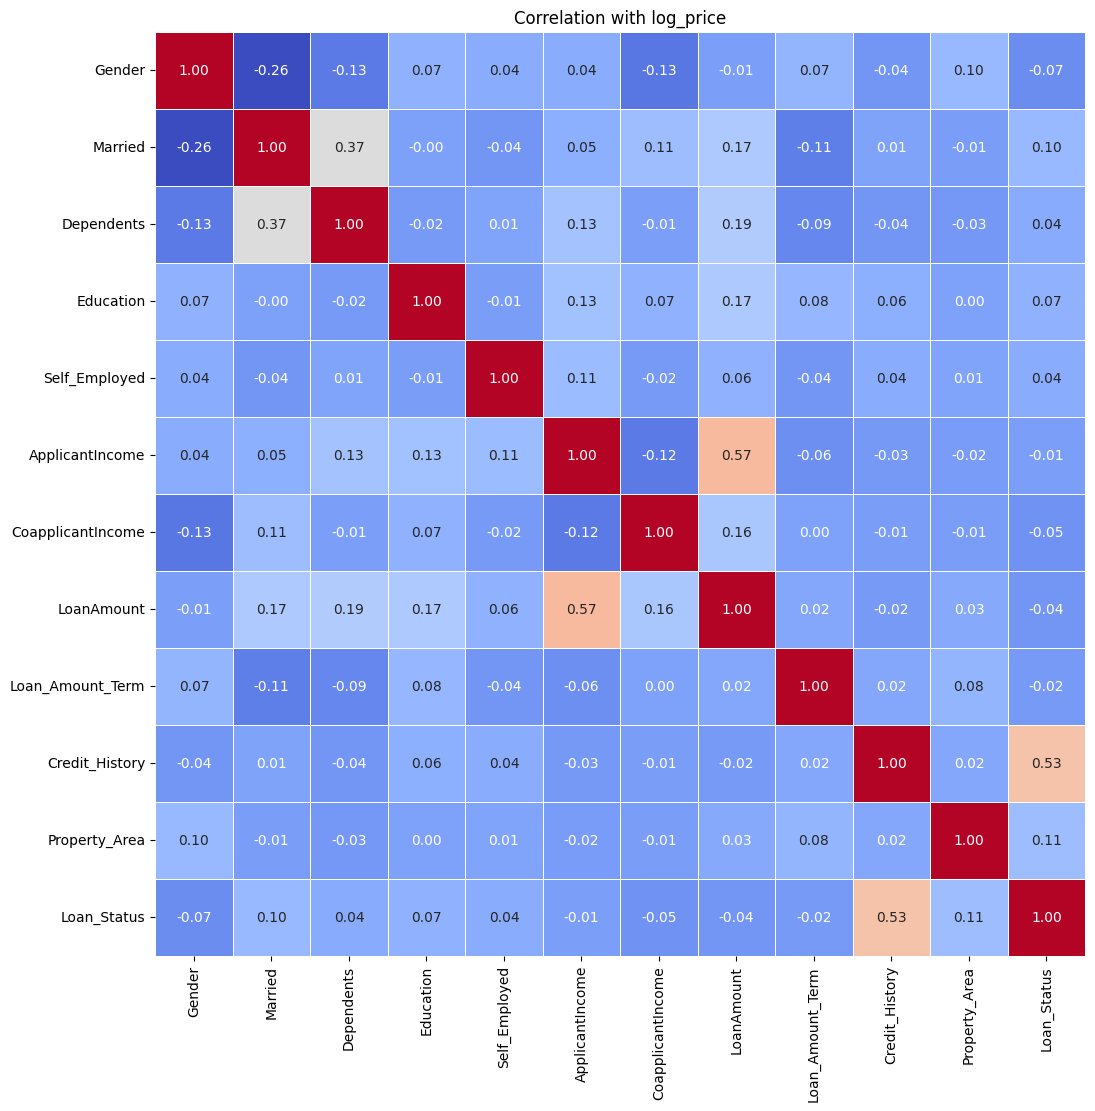

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar=False)
plt.title('Correlation with log_price')
plt.show()

## Distribution

<Figure size 800x400 with 0 Axes>

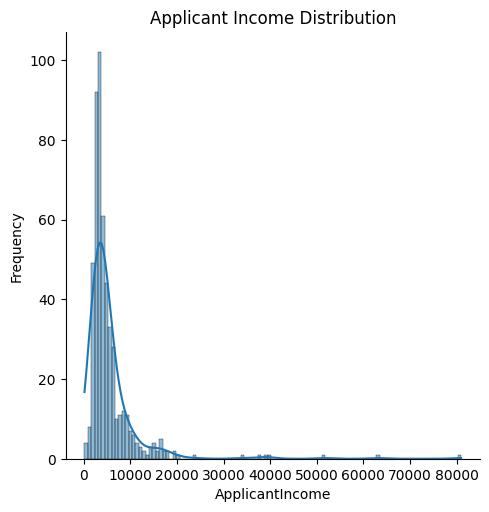

int64


<Figure size 800x400 with 0 Axes>

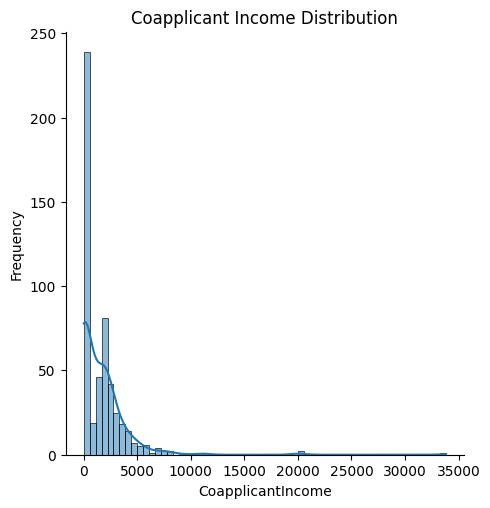

int64


<Figure size 800x400 with 0 Axes>

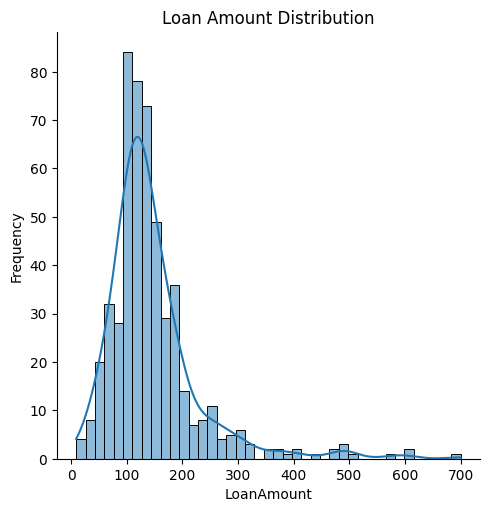

int64


<Figure size 800x400 with 0 Axes>

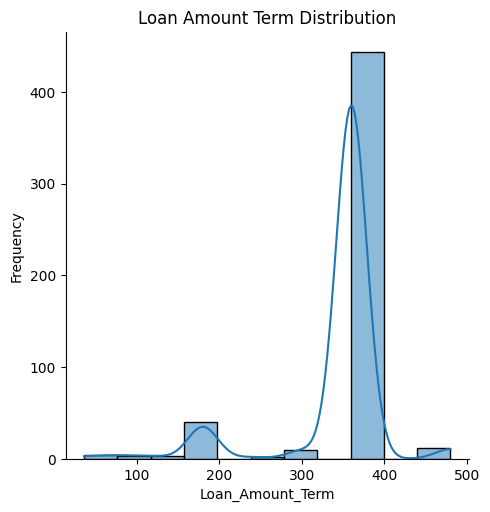

int64
[360 120 180  60 300 480 240  36  84]


In [27]:
def plot_distribution(column, title):
    plt.figure(figsize=(8, 4))
    sns.displot(data=data, x=column, kde=True)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    print(data[column].dtype)

plot_distribution("ApplicantIncome", "Applicant Income Distribution")
plot_distribution("CoapplicantIncome", "Coapplicant Income Distribution")
plot_distribution("LoanAmount", "Loan Amount Distribution")
plot_distribution("Loan_Amount_Term", "Loan Amount Term Distribution")

print(data["Loan_Amount_Term"].unique())


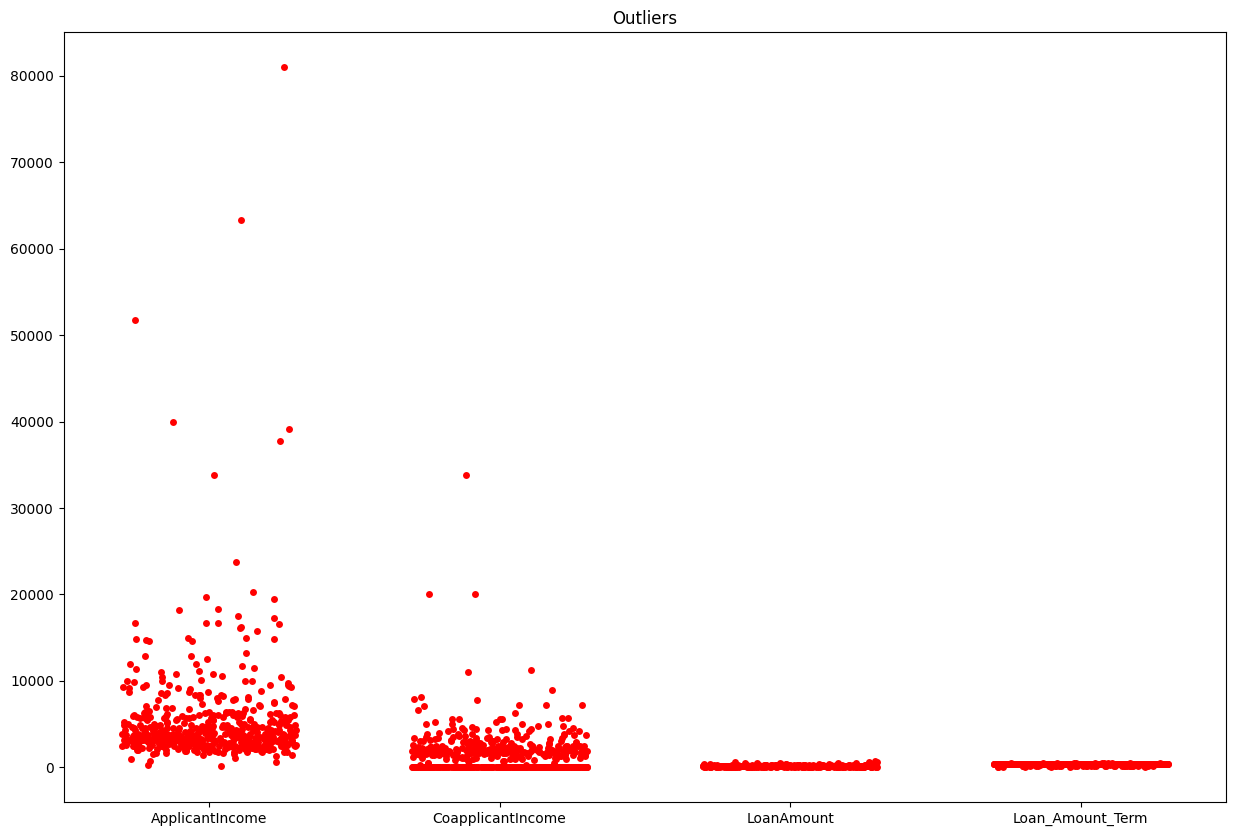

In [28]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Only variables that have outliers
outliersColumns = data.get(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"])

# Add outliers to the plot
sns.stripplot(data=outliersColumns, color="red", jitter=0.3, size=5)

# Set the axis labels and title
plt.title("Outliers")

# Show the plot
plt.show()

# Scaling

In [29]:
from termcolor import colored # For colored text printing

col = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]
#col = data.columns

# IQR Scaling
Q1 = data[col].astype(np.float32).quantile(0.25)
Q3 = data[col].astype(np.float32).quantile(0.75)

# Calcuate the Interquartile Range (IQR)
IQR = Q3 - Q1



# Removing Qutliers
data = data[~((data[col] < (Q1 - 1.5 * IQR)) |(data[col] > (Q3 + 1.5 * IQR))).any(axis=1)]

# printing shape
print(data.shape)

# Check and ensure running
print(colored("The task has been completed without any errors....", "green", attrs=['reverse']))

# Square Root Transformation - to normalized the distribution.
data["ApplicantIncome"] = np.sqrt(data["ApplicantIncome"])
data["CoapplicantIncome"] = np.sqrt(data["CoapplicantIncome"])
data["LoanAmount"] = np.sqrt(data["LoanAmount"])
data["Loan_Amount_Term"] = np.sqrt(data["Loan_Amount_Term"])

print(colored("We will see the distribution after Scaling","green", attrs=["reverse"]))

(446, 12)
The task has been completed without any errors....
We will see the distribution after Scaling


C:\Users\alexf\AppData\Local\Temp\ipykernel_38804\1766069059.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ApplicantIncome"] = np.sqrt(data["ApplicantIncome"])
C:\Users\alexf\AppData\Local\Temp\ipykernel_38804\1766069059.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["CoapplicantIncome"] = np.sqrt(data["CoapplicantIncome"])
C:\Users\alexf\AppData\Local\Temp\ipykernel_38804\1766069059.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

# Import Libriaries

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# DecisionTreeClassifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

X = data.drop(["Loan_Status"], axis=1)
Y = data["Loan_Status"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

dtc = DecisionTreeClassifier(max_depth=5, min_samples_split=3, random_state=42, class_weight={0: 5, 1: 1})
dtc.fit(X_train, Y_train)

Y_pred = dtc.predict(X_test)

print("test accuracy",accuracy_score(Y_test, Y_pred))
print("train accuracy",accuracy_score(Y_train, dtc.predict(X_train)))

test accuracy 0.5666666666666667
train accuracy 0.5814606741573034


# RandomForestClassifier

In [32]:
from sklearn.ensemble import RandomForestClassifier


X = data.drop(["Loan_Status"], axis=1)
Y = data["Loan_Status"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

test_scores = []
train_scores = []

tab = [i*5 for i in range(1, 20)] 

tab1 = []
tab2 = []
tab3 = []

for max_dep in range(1, 10):
    # Iterate over different values of random_state
    for rand_state in tab:
        # Iterate over different values of n_estimators
        for n_est in tab:

            tab1.append(max_dep)
            tab2.append(rand_state)
            tab3.append(n_est)

            rfc = RandomForestClassifier(n_estimators=n_est, max_depth=max_dep, min_samples_split=5, random_state=rand_state, class_weight={0: 5, 1: 1})
            rfc.fit(X_train, Y_train)

            Y_pred = rfc.predict(X_test)

            test_scores.append(accuracy_score(Y_test, Y_pred))
            train_scores.append(accuracy_score(Y_train, rfc.predict(X_train)))


print("--------------------------------------------------------------------")
test_acc = max(test_scores)
print("accuracy of test data :")
print(" test accuracy",test_acc)
print(" train accuracy",train_scores[test_scores.index(test_acc)])
print("parameter :")
print(" n_estimators",tab3[test_scores.index(test_acc)])
print(" max_depth",tab1[test_scores.index(test_acc)])
print(" random_state",tab2[test_scores.index(test_acc)])


# Best model with best parameters

- Model : 
    - RandomForestClassifier
    
- Parameters:   
    - n_estimators=20,    
    - max_depth=8,    
    - min_samples_split=5,    
    - random_state=60,    
    - class_weight={0: 5, 1: 1})  

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

X = data.drop(["Loan_Status"], axis=1)
Y = data["Loan_Status"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

rfc = RandomForestClassifier(
    n_estimators=20, 
    max_depth=8, 
    min_samples_split=5, 
    random_state=60,
    class_weight={0: 5, 1: 1})

rfc.fit(X_train, Y_train)

Y_pred = rfc.predict(X_test)

print("test accuracy",accuracy_score(Y_test, Y_pred))
print("train accuracy",accuracy_score(Y_train, rfc.predict(X_train)),"\n")

# Cross-validation
cv_scores = cross_val_score(rfc, X, Y, cv=5)
print(f'Cross-validation Scores: {cv_scores}')
print(f'Mean Cross-validation Score: {np.mean(cv_scores)}\n')

# Classification Report
y_pred = rfc.predict(X_test)
print('Classification Report:')
print(classification_report(Y_test, y_pred),"\n")

# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(Y_test, y_pred))

NameError: name 'train_test_split' is not defined

# Make Predictions on test data

In [4]:
test = pd.read_csv("test.csv")
cleaner = Cleaner(test,"test")
test = cleaner.clean()
predictions = pd.DataFrame(index = test["Loan_ID"],data ={
    "Loan_Status": rfc.predict(test.drop(["Loan_ID"], axis=1))})
predictions.to_csv("predictions.csv")

NameError: name 'rfc' is not defined